In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, Imputer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# Loading data
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
clivelandData = pd.read_csv('cleveland.csv', names = features)
hungarianData = pd.read_csv('hungary.csv', names = features)
switzerlandData = pd.read_csv('switzerland.csv', names = features)

In [3]:
# combining datasets
datatemp = [clivelandData, hungarianData, switzerlandData]
data = pd.concat(datatemp)
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
118,70.0,1.0,4.0,115,0,0,1,92,1,0,2,?,7,1
119,70.0,1.0,4.0,140,0,1,0,157,1,2,2,?,7,3
120,72.0,1.0,3.0,160,0,?,2,114,0,1.6,2,2,?,0
121,73.0,0.0,3.0,160,0,0,1,121,0,0,1,?,3,1
122,74.0,1.0,2.0,145,0,?,1,123,0,1.3,1,?,?,1


In [4]:
data = data.drop(["ca", "slope", "thal"],axis=1)
data = data.replace('?', np.nan)

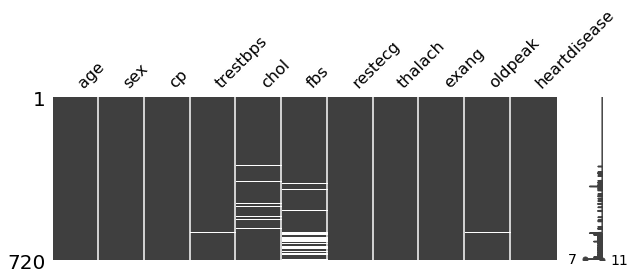

In [5]:
# Missing data detection
msno.matrix(data,figsize=(10,3))

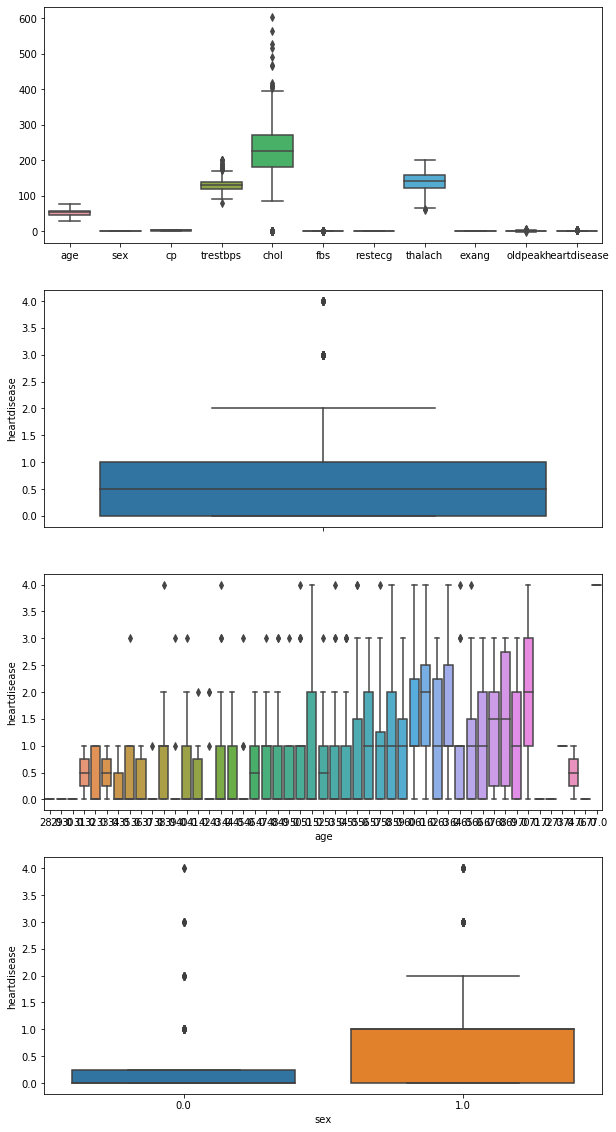

In [6]:
# Outliers detection and class imbalance
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 20)
sn.boxplot(data=data,orient="v",ax=axes[0])
sn.boxplot(data=data,y="heartdisease",orient="v",ax=axes[1])
sn.boxplot(data=data,y="heartdisease",x="age",orient="v",ax=axes[2])
sn.boxplot(data=data,y="heartdisease",x="sex",orient="v",ax=axes[3])

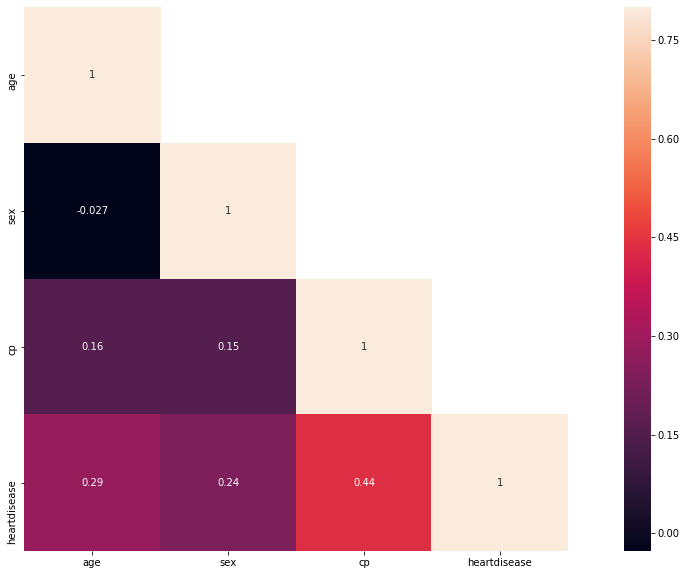

In [7]:
# Correlation analysis
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [8]:
# Preprocessing the data
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputedData = imp.fit_transform(data)
imputedData.tail()

C:\Users\archi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [9]:
# Creating Test and Train data
X_train, X_test, y_train, y_test = train_test_split(imputedData[:, :-1], imputedData[:, -1], test_size=0.3, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Build and train the Model
classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)

In [11]:
# Accuracy of predictions
accuracy_score(y_test, preds)

0.6527777777777778

In [12]:
# Build and train the Model
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)
# Accuracy of predictions
accuracy_score(y_test, preds)

0.6203703703703703

In [13]:
# Build and train the Model
classifier = svm.SVC(kernel='sigmoid')
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)
# Accuracy of predictions
accuracy_score(y_test, preds)

0.6296296296296297

In [14]:
# Build and train the Model
classifier = svm.SVC(kernel='poly')
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)
# Accuracy of predictions
accuracy_score(y_test, preds)

0.6296296296296297